In [ ]:
THE SPARKS FOUNDATION- Data Science And Business Analytics Internship
TASK 2- Prediction Using Unsupervised Machine Learning
AUTHOR- Aindrila Acharyya Chaudhuri

From the given dataset, to predict the optimum number of clusters and represent it visually.
Dataset- https://bit.ly/3kXTdox

In [6]:
import numpy as np                         #to work with arrays
import matplotlib.pyplot as plt            #for data visualisation
import pandas as pd                        #for data manipulation and analysis
from sklearn.cluster import KMeans         #for K-means clustering of data

In [18]:
import warnings as wg                      #to ingore warnings, if any, in the program
wg.filterwarnings("ignore")

In [ ]:
We now proceed to read the dataset given to us and describe the data.

In [11]:
data = pd.read_csv('Iris.csv')

In [12]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
From the above dataset, we see that the given dataset has 150 rows and 6 columns.

In [ ]:
We now proceed on to gain a visual representation of the data.

In [14]:
data.columns                      #to get the names of the columns from the above dataset

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
data.describe                     #to compute the statistical constants

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [ ]:
We now proceed on to find Optimum Number of clusters in the given dataset.
We will now drop the label (species) column from the dataset as it is unsupervised learning.

In [16]:
flower = pd.DataFrame(data)
flower_dataframe = flower.drop(columns= ['Species', 'Id'] )   #Dropping two columns,Species and Id from the dataset
print(flower_dataframe.head())
print(flower_dataframe.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8


In [ ]:
As we can see from the above output, Id and Species columns have been dropped out!

In [ ]:
To find optimum number of clusters, we use the Elbow Method.
The Elbow method runs K-means clustering on a dataset for a range of values and then for each value of k, computes
an average score.
The Elbow Method is the most popular method to determine the optimal number of clusters into which the data may be clustered!
For each value, within-cluster sum of squares value is computed and stored in some list.
These values are then plotted against the number of clusters used before.
The location of bend in the graph indicates the optimal number of clusters.

In [19]:
within_cluster_ss = []                        #To calculate within cluster sum of squares and store it in this array
c_range = range(1,8)                          #Specifying the range of clusters

for k in c_range:                             #Iterating the values of k from 1 to 7
    km = KMeans(n_clusters=k)                 #Here we are using k-means clustering algorithm to find k number of 
    km = km.fit(flower_dataframe)             #centroid(minimum) and then plot set of data around them as nearest 
    within_cluster_ss.append(km.inertia_)     #as possible using sum of squares method.

In [ ]:
Now we proceed on to plot the graph of within cluster sum of squares versus range of clusters.

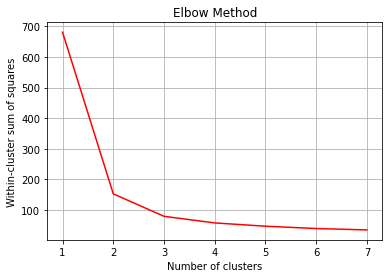

In [20]:
plt.plot(c_range, within_cluster_ss, color = 'Red')  #Specifying the parameters of the plot
plt.title('Elbow Method')                                   #For the title of the plot
plt.xlabel('Number of clusters')                            #Specifying the X-axis
plt.ylabel('Within-cluster sum of squares')                 #Specifying the Y-axis
plt.grid()                                                  #To add grid lines to the plot
plt.show()

In [ ]:
We now apply K-Mean Clustering on the data.

In [22]:
from sklearn.cluster import KMeans              #Importing KMeans class from cluster module of sklearn library
model  = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0) #here Number of clusters to form is 3
#max_iter represents the maximum number of iterations for the k-means algorithm, n_init is the no of times the K-Means algorithm
#will be run with different centroid seeds
pred = model.fit_predict(flower_dataframe)      #To compute the cluster centers and predict cluster index for each sample
#fit_predict() is mainly used in unsupervised learning where we don't have labelled inputs.


In [ ]:
VISUALISATION OF THE CLUSTERS:

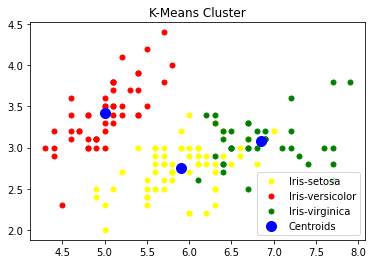

In [28]:
x = flower_dataframe.iloc[:, [0, 1, 2, 3]].values   #iloc() to extract all rows and 1,2,3,4 columns of the data
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 25, c = 'Yellow', label = 'Iris-setosa')  #Scatter diagram for Iris-setosa species
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 25, c = 'Red', label = 'Iris-versicolor') #Scatter diagram for Iris-versicolor species
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 25, c = 'Green', label = 'Iris-virginica')#Scatter diagram for Iris-virginica species

#Below we are plotting a scatter diagram for each centroid which represnts the imaginary or real location of center of cluster.
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'Blue', label = 'Centroids')
plt.title('K-Means Cluster')      #To label the title of the graph
plt.legend()                      #To label the different elements of the graph
plt.show()

In [ ]:
Hence with this, we have predicted the optimal number of clusters and represented it visually using K-Mean Clustering Algorithm .